<a href="https://colab.research.google.com/github/anj162004/Hospital-Management-System/blob/main/student_score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary Python libraries for data processing, visualization, and modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()


Saving StudentsPerformance.csv to StudentsPerformance.csv


In [ ]:
# Loading the student performance dataset from a CSV file
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()    # Basic information about columns and data types
df.isnull().sum() #Missing (null) values in each column
df.describe()#Statistical summary of numeric columns
df.shape # returns the no of rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


(1000, 8)

In [ ]:
df[df.isnull().any(axis=1)]     # Identifying rows with missing or invalid values,
df.replace(['','NA','?'],np.nan,inplace=True)# replacing empty strings, 'NA', and '?' with NaN,
missing_rows=df[df.isnull().any(axis=1)]  # displaying all rows that still contain missing values
print(missing_rows)

Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


In [ ]:
df['math score'].fillna(df['math score'].mean(),inplace=True)   # Filling missing values in 'math score' column with the column's mean value


<ipython-input-91-afceff29d1aa>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math score'].fillna(df['math score'].mean(),inplace=True)


In [ ]:
df.columns  # Display all column names of the DataFrame
df.isnull()  # Check for missing values in each cell of the DataFrame (True if missing, False otherwise)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [ ]:
def check_missing(dataframe):   # Function to check if the DataFrame has any missing values
 if dataframe.isnull().sum().sum()==0:
    print("NO missing values.") # Prints a message indicating whether missing values exist or not
  else:
    print("Missing values exist.")

check_missing(df)

NO missing values.


In [ ]:
df['gender'].value_counts()   # Count the number of occurrences of each unique value in the 'gender' column


,count
gender,
female,518
male,482


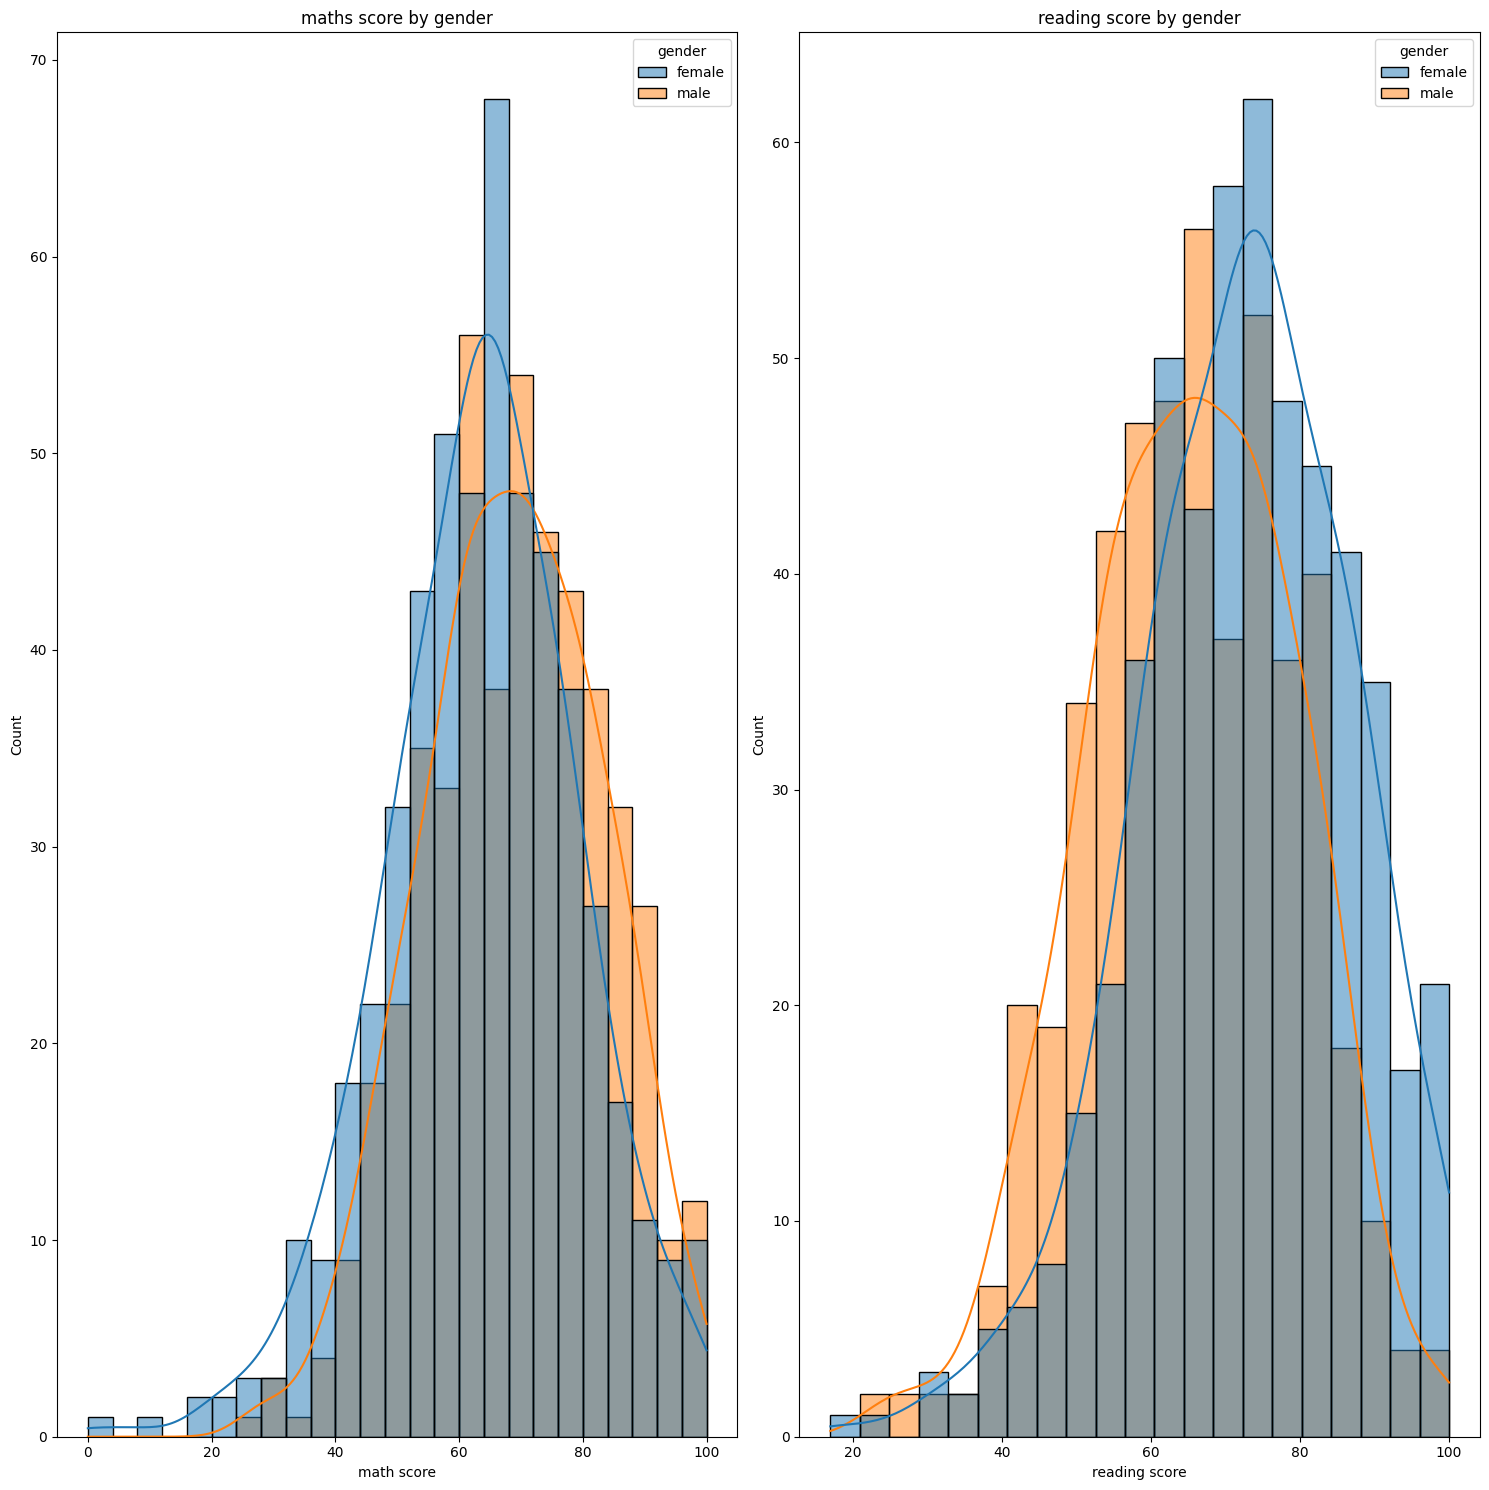

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,15))  # Create side-by-side histograms with KDE curves for 'math score' and 'reading score',


sns.histplot(data=df,x='math score',hue='gender',kde=True,ax=axes[0]) # colored by 'gender', to compare score distributions across genders
axes[0].set_title("maths score by gender")


sns.histplot(data=df,x='reading score',hue='gender',kde=True,ax=axes[1])
axes[1].set_title("reading score by gender")
plt.tight_layout()
plt.show()





In [ ]:
categorial_col=df.select_dtypes(include=['object']).columns  # Select categorical columns (dtype 'object')
categorial_col
encoded_df=pd.get_dummies(df[categorial_col],drop_first=True)#apply one-hot encoding with drop_first=True to avoid dummy variable trap
encoded_df=encoded_df.astype(int)
encoded_df.head() ## convert encoded columns to integers, and display the first few rows

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,1,1


In [ ]:
encoded_df.columns.tolist()  # Get the list of column names from the encoded DataFrame


['gender_male',
 'race/ethnicity_group B',
 'race/ethnicity_group C',
 'race/ethnicity_group D',
 'race/ethnicity_group E',
 "parental level of education_bachelor's degree",
 'parental level of education_high school',
 "parental level of education_master's degree",
 'parental level of education_some college',
 'parental level of education_some high school',
 'lunch_standard',
 'test preparation course_none']

In [ ]:
numeric_col=["math score","writing score","reading score"]     ## Select numeric columns related to scores and concatenate them with the encoded categorical columns


numeric_df=df[numeric_col]

final_df = pd.concat([encoded_df, numeric_df], axis=1)  # to form the final combined DataFrame for modeling
final_df.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,math score,writing score,reading score
0,0,1,0,0,0,1,0,0,0,0,1,1,72,74,72
1,0,0,1,0,0,0,0,0,1,0,1,0,69,88,90
2,0,1,0,0,0,0,0,1,0,0,1,1,90,93,95
3,1,0,0,0,0,0,0,0,0,0,0,1,47,44,57
4,1,0,1,0,0,0,0,0,1,0,1,1,76,75,78


In [ ]:
#assuming my target score is maths score

X = final_df.drop('math score', axis=1)  # Features
y = final_df['math score']               # Target

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)

print("R² Score:", model.score(X_test, y_test))# Calculate and print the R² score to evaluate the model’s performance on the test data


[76.3879697  58.88597004 76.99026483 76.85180448 87.62737816 79.0140238
 64.65460865 53.00791885 74.18471015 49.21353815 52.94765047 36.66906418
 67.9139255  52.27725558 86.71848338 70.53070205 51.95556639 46.8314386
 48.82375101 52.72669531 73.88582984 38.88612362 57.38074421 36.32839723
 78.14908978 81.79995075 75.3849409  46.1184787  31.03596334 49.90094972
 65.98409138 70.4116652  60.5061564  83.73986218 84.43184961 46.07265627
 76.10135181 70.20596817 65.85782103  3.76186106 78.49792748 67.25291552
 67.97175998 60.2734092  79.67385074 67.60005539 72.24589185 24.76000748
 85.95581153 70.08842684 75.41268803 66.79864565 81.16502181 45.6635254
 66.11051928 67.32545668 86.13600492 58.72739768 82.23614367 81.21768838
 47.23421792 72.04512129 70.64302698 55.92646405 86.31798368 63.86663678
 59.48657443 55.91061249 57.20534331 82.14529335 71.7699997  80.48800131
 58.37254249 46.38271551 61.23110052 85.00868631 84.24763549 60.29504754
 59.29079503 53.21863924 63.67390126 41.11157129 78.88

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred=model.predict(X_test)
print("Mean sqaured error",mean_squared_error(y_test,y_pred))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred)))
print("mean absolute error",mean_absolute_error(y_test,y_pred))


Mean sqaured error 29.09516986671551
root mean squared error 5.393993869732845
mean absolute error 4.214763142474851


[]

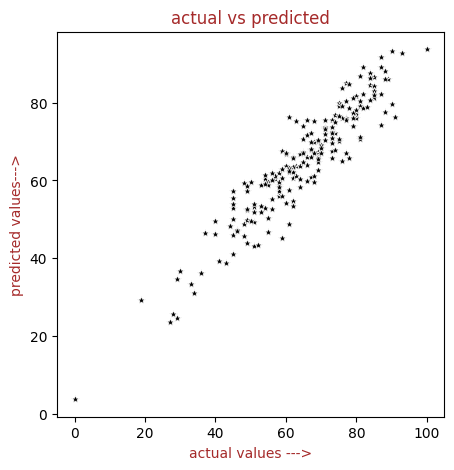

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test,y=y_pred,marker='*',color='black')
plt.xlabel("actual values --->",color='brown')
plt.ylabel("predicted values--->",color='brown')
plt.title("actual vs predicted",color='brown')
plt.plot()


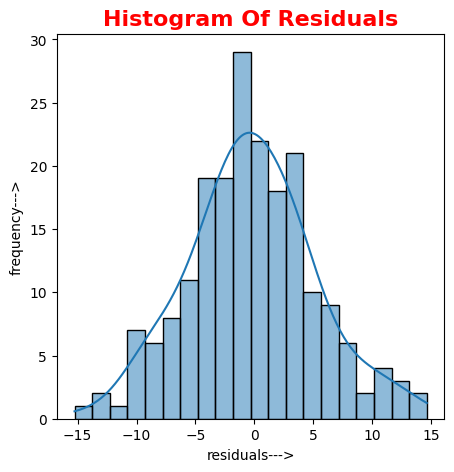

In [ ]:
#visualization of residuals
residuals=y_test-y_pred
plt.figure(figsize=(5,5))
sns.histplot(residuals,bins=20,kde=True)
plt.xlabel("residuals--->")
plt.ylabel("frequency--->")
plt.title("Histogram Of Residuals",fontsize=16, fontweight='bold',color='red')
plt.show()

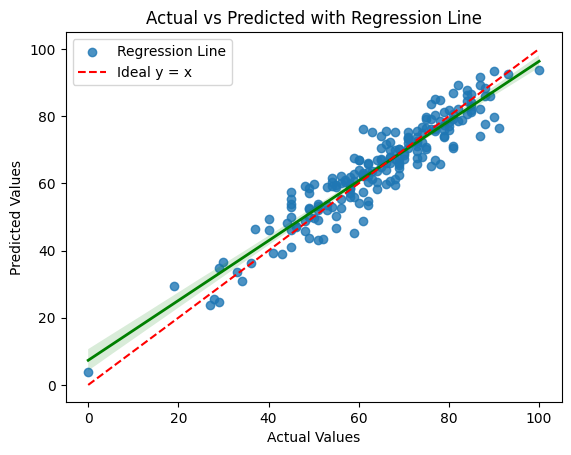

In [ ]:
sns.regplot(x=y_test, y=y_pred, label='Regression Line',line_kws={'color':'green','linewidth':2})  # Plot actual vs predicted values with regression and ideal y=x reference lines
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', label='Ideal y = x',color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Actual vs Predicted with Regression Line")
plt.show()